**LungCancer prediction system

In [47]:
#importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [48]:
#loading the dataset
df = pd.read_csv('survey lung cancer.csv')
df


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [49]:
#shape of the data
df.shape

(309, 16)

In [50]:
#columns
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [51]:

#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [52]:
#understanding the data
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [53]:
#checking if  the data has null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [54]:
#droping duplicates in the data
df.drop_duplicates(inplace=True)

In [55]:
df.columns = df.columns.str.lower() 

In [56]:
#dropping all the columns that are not needed
df.drop(columns = ['gender'], inplace =True)

In [57]:
#changing TReatment Outcome to be a ) and 1
df['lung_cancer'] = df['lung_cancer'].map({'YES': 1, 'NO': 0})

In [58]:
#splitting the dataset
x = df.drop(columns = ['lung_cancer'])
y = df['lung_cancer']

In [59]:
#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
# scaling the dataset
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56

Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.83      1.00      0.91        44

    accuracy                           0.84        56
   macro avg       0.92      0.62      0.65        56
weighted avg       0.87      0.84      0.80        56

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.

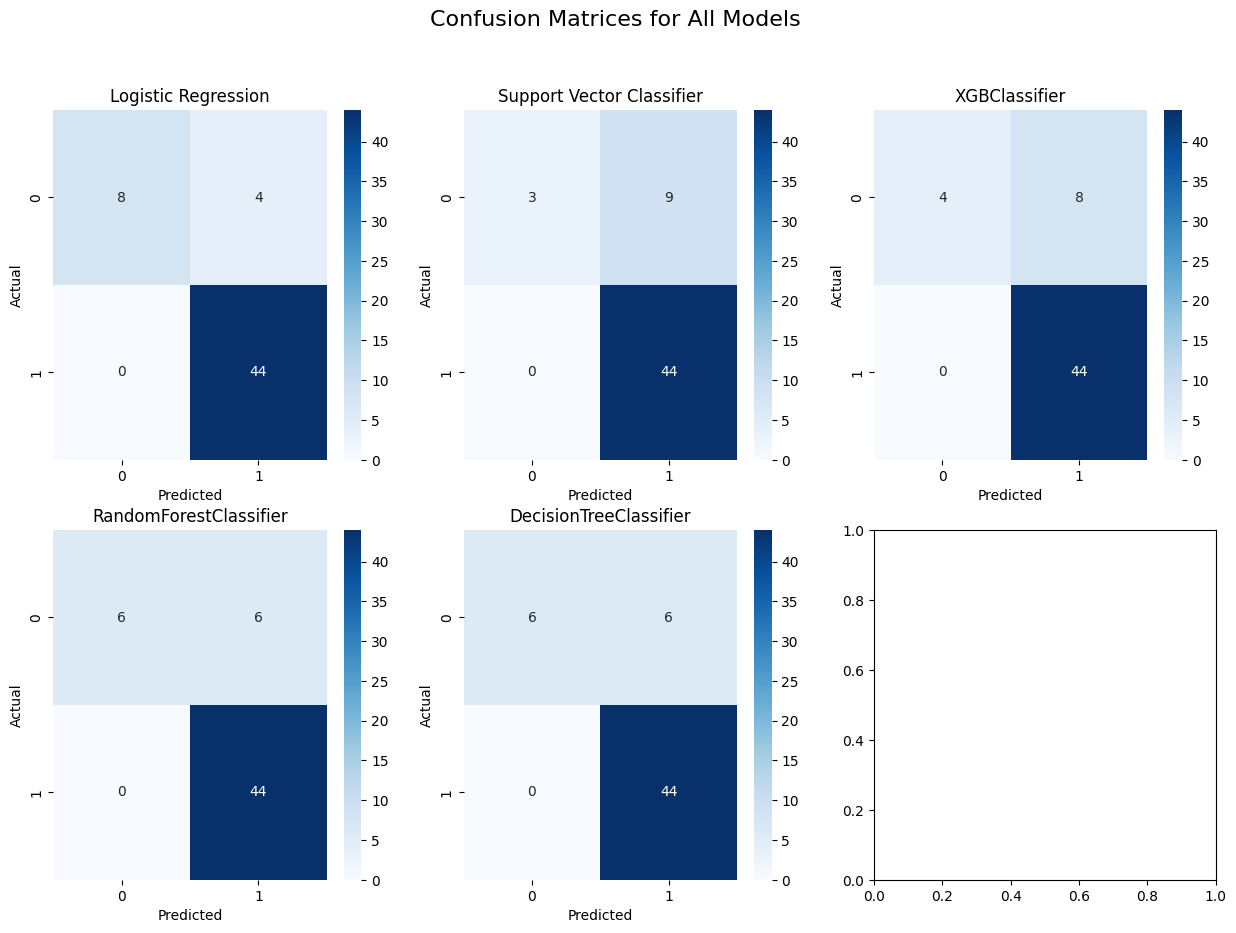

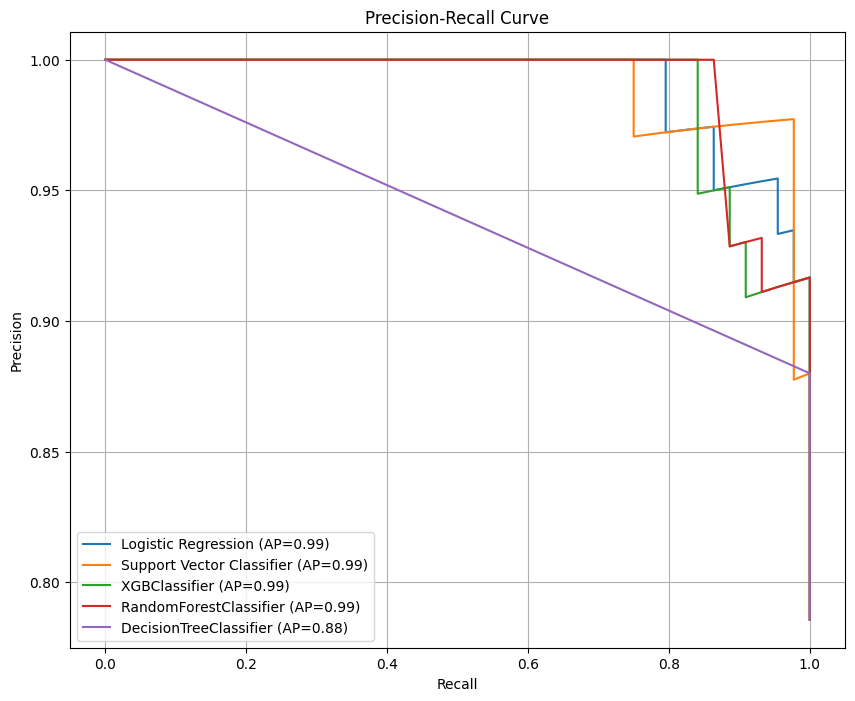

In [61]:
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initializing the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(probability=True),  # SVC needs probability=True for predict_proba
    'XGBClassifier': XGBClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

# Initialize the plot for Precision-Recall Curve
plt.figure(figsize=(10, 8))

# Create a subplot figure for confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Confusion Matrices for All Models', fontsize=16)

for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(x_train_scaled, y_train)

    # Get predicted probabilities
    y_probs = model.predict_proba(x_test_scaled)[:, 1]  # Assuming binary classification

    # Predict the labels for classification report
    y_pred = model.predict(x_test_scaled)

    # Generate and print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix in the subplot
    ax = axes[i // 3, i % 3]  # Determine subplot position
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

    # Calculate precision and recall, use encoded y_test
    precision, recall, _ = precision_recall_curve(y_test, y_probs)

    # Plot the PR curve
    plt.figure(1)
    plt.plot(recall, precision, label=f'{name} (AP={average_precision_score(y_test, y_probs):.2f})')

# Add labels and title for the Precision-Recall Curve plot
plt.figure(1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Show the confusion matrices subplot figure



In [62]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(solver='liblinear',max_iter=100)

# Train the model
model.fit(x_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [63]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.fit_transform(x_test)
print(X_train_sc)
prediction = model.predict(x_test)

[[-0.40445505  0.94686415  0.85573563 ...  0.77835687  1.08545743
  -1.13651514]
 [-3.14230461 -1.05611771  0.85573563 ...  0.77835687 -0.92127059
   0.87988269]
 [ 0.4666789   0.94686415  0.85573563 ...  0.77835687  1.08545743
   0.87988269]
 ...
 [-1.77337983 -1.05611771 -1.16858521 ...  0.77835687 -0.92127059
  -1.13651514]
 [ 1.71115597  0.94686415  0.85573563 ...  0.77835687  1.08545743
  -1.13651514]
 [ 1.08891744  0.94686415  0.85573563 ...  0.77835687  1.08545743
   0.87988269]]


In [64]:
#accuracy of the training data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print("The accuracy of  the training data:",training_data_accuracy)


The accuracy of  the training data: 0.8818181818181818


In [65]:
#the accuracy of the testing data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print("The accuracy of  the testing data:",test_data_accuracy)



The accuracy of  the testing data: 0.7857142857142857


In [66]:
input_data=(21,2,2,2,2,2,2,2,2,1,1,2,1,1)
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for one data pointi
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print("presence of lung cancer")
else:
    print("absence of lungcancer")

[1]
absence of lungcancer


In [69]:
import pickle
from sklearn.linear_model import LogisticRegression

#Initialize the model
model = LogisticRegression()

# Train the model
model.fit(x_train_scaled, y_train)

# Save the model to a file using pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)
